In [101]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
from keras.src import backend
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from keras.optimizers import Adam, SGD
from sklearn.metrics import classification_report

In [83]:
def load_batch(fpath, label_key="labels"):
    """Internal utility for parsing CIFAR data.

    Args:
        fpath: path the file to parse.
        label_key: key for label data in the retrieve
            dictionary.

    Returns:
        A tuple `(data, labels)`.
    """
    with open(fpath, "rb") as f:
        d = pickle.load(f, encoding="bytes")
        # decode utf8
        d_decoded = {}
        for k, v in d.items():
            d_decoded[k.decode("utf8")] = v
        d = d_decoded
    data = d["data"]
    labels = d[label_key]

    data = data.reshape(data.shape[0], 3, 32, 32)
    return data, labels
def load_data_keras():
    num_train_samples = 50000

    x_train = np.empty((num_train_samples, 3, 32, 32), dtype="uint8")
    y_train = np.empty((num_train_samples,), dtype="uint8")
    path = "../Data"
    # batches are within an inner folder
    path = os.path.join(path, "cifar-10-batches-py")
    for i in range(1, 6):
        fpath = os.path.join(path, "data_batch_" + str(i))
        (
            x_train[(i - 1) * 10000 : i * 10000, :, :, :],
            y_train[(i - 1) * 10000 : i * 10000],
        ) = load_batch(fpath)

    fpath = os.path.join(path, "test_batch")
    x_test, y_test = load_batch(fpath)

    y_train = np.reshape(y_train, (len(y_train), 1))
    y_test = np.reshape(y_test, (len(y_test), 1))

    if backend.image_data_format() == "channels_last":
        x_train = x_train.transpose(0, 2, 3, 1)
        x_test = x_test.transpose(0, 2, 3, 1)

    x_test = x_test.astype(x_train.dtype)
    y_test = y_test.astype(y_train.dtype)

    return (x_train, y_train), (x_test, y_test)        

In [84]:
(x_train, y_train), (x_test, y_test) = load_data_keras()
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


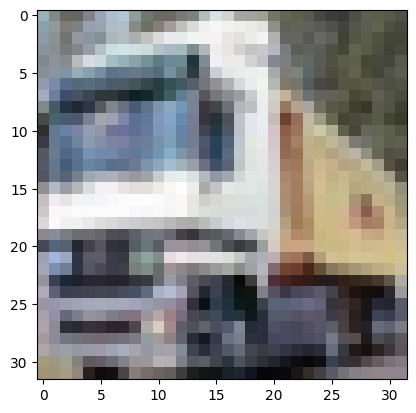

In [85]:
# Check that it's actuall images
plt.imshow(x_train[1])

In [86]:
#set hyperparameters
batch_size = 128
learning_rate = 0.001
num_epochs = 100

In [110]:
lin_model = Sequential([
    Input(shape=(32,32,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

lin_model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy, metrics=['accuracy'])
        

In [111]:
lin_history = lin_model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test), batch_size=batch_size)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1895 - loss: 159.6740 - val_accuracy: 0.2138 - val_loss: 74.3923
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2510 - loss: 63.2150 - val_accuracy: 0.2798 - val_loss: 35.2449
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2478 - loss: 64.8415 - val_accuracy: 0.2679 - val_loss: 56.6985
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2655 - loss: 57.6639 - val_accuracy: 0.2445 - val_loss: 58.1123
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2654 - loss: 60.5993 - val_accuracy: 0.2589 - val_loss: 63.2015
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2634 - loss: 63.2023 - val_accuracy: 0.2744 - val_loss: 55.4044
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2645 - loss: 63.9174 - val_accuracy: 0.2629 - val_loss: 47.4349
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2745 - loss: 55

In [112]:
classnames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

y_pred = lin_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred, target_names=classnames, digits=4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step
              precision    recall  f1-score   support

    airplane     0.2406    0.1470    0.1825      1000
  automobile     0.6081    0.0900    0.1568      1000
        bird     0.4375    0.0140    0.0271      1000
         cat     0.2209    0.3130    0.2590      1000
        deer     1.0000    0.0030    0.0060      1000
         dog     0.3125    0.0250    0.0463      1000
        frog     0.3538    0.4490    0.3958      1000
       horse     0.4610    0.3190    0.3771      1000
        ship     0.2062    0.8590    0.3326      1000
       truck     0.3190    0.5050    0.3910      1000

    accuracy                         0.2724     10000
   macro avg     0.4160    0.2724    0.2174     10000
weighted avg     0.4160    0.2724    0.2174     10000

